<a href="https://colab.research.google.com/github/hisjeans/ForHerSystem/blob/main/5_3%EC%95%99%EC%83%81%EB%B8%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 트리의 앙상블

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/5-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 랜덤포레스트

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

wine = pd.read_csv('https://bit.ly/wine-date')

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [15]:
wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [2]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=42) #n_jobs->멀티코어 ?개 사용할 지
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)
#cross_validate->검증세트 사용해 훈련세트-테스트세트 격차 줄여볼 것

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


In [3]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


In [4]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)

rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


## 엑스트라트리

In [5]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


In [6]:
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


## Permutation Importance

Permutation Importance는 모델의 예측 성능이 특정 특성에 얼마나 의존하는지 측정하는 방법입니다. 특성의 값을 무작위로 섞었을 때 모델의 성능이 얼마나 저하되는지를 통해 해당 특성의 중요도를 평가합니다. 특성 중요도(feature_importances_)는 훈련 데이터에 대한 영향력을 보여주지만, permutation importance는 테스트 데이터나 새로운 데이터에 대한 모델의 일반화 성능에 미치는 영향을 더 잘 보여줄 수 있습니다.

/tmp/ipython-input-4154868625.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(result.importances[sorted_idx].T,


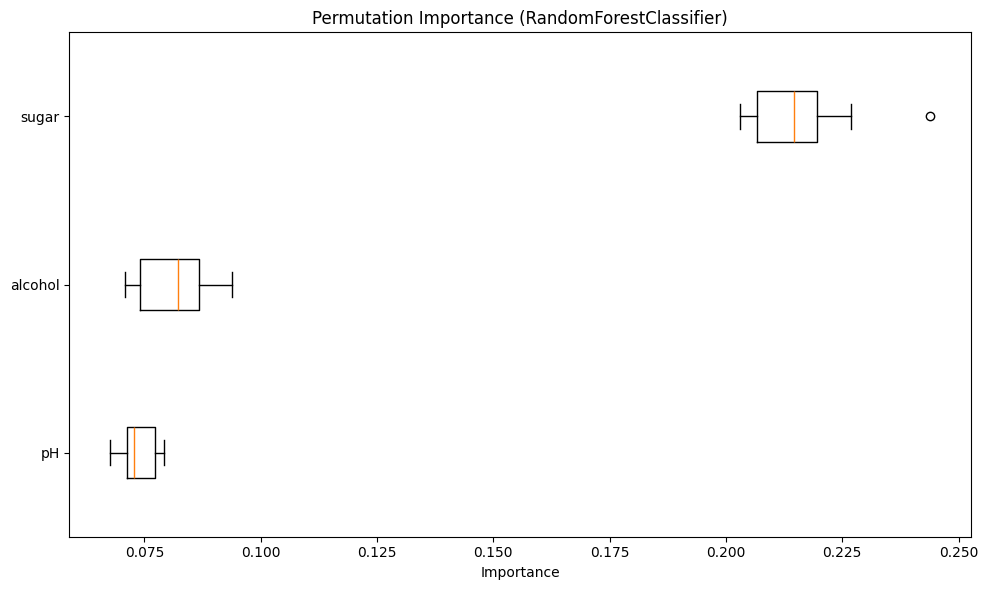

In [16]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# `rf` 모델은 이미 train_input과 train_target으로 학습되어 있습니다.
# test_input과 test_target을 사용하여 permutation importance를 계산합니다.
result = permutation_importance(rf, test_input, test_target, n_repeats=10, random_state=42, n_jobs=-1)

# 중요도 평균과 표준편차를 정렬합니다.
sorted_idx = result.importances_mean.argsort()

# 특성 이름 (원본 데이터셋의 컬럼 이름)
feature_names = ['alcohol', 'sugar', 'pH']

# 시각화
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=[feature_names[i] for i in sorted_idx])
ax.set_title("Permutation Importance (RandomForestClassifier)")
ax.set_xlabel("Importance")
plt.tight_layout()
plt.show()

위 그래프는 각 특성의 Permutation Importance를 상자 그림(boxplot)으로 보여줍니다. 상자의 중앙선은 중요도의 평균을 나타내고, 상자의 길이는 중요도의 변동성을 나타냅니다. 이 결과를 통해 어떤 특성이 모델의 예측에 가장 큰 영향을 미치는지 시각적으로 확인할 수 있습니다.

## 그레이디언트 부스팅

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


In [8]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


In [9]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15887763 0.6799705  0.16115187]


## 히스토그램 기반 부스팅

In [10]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

/usr/local/lib/python3.12/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:19: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


0.9321723946453317 0.8801241948619236


In [11]:
hgb.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


In [12]:
hgb.score(test_input, test_target)

0.8723076923076923

In [17]:
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, test_input, test_target, n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)
result=permutation_importance(hgb, train_input, train_target, n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)
hgb.score(test_input, test_target)

[0.05969231 0.20238462 0.049     ]
[0.08876275 0.23438522 0.08027708]


0.8723076923076923

#### XGBoost

In [13]:
from xgboost import XGBClassifier

xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9567059184812372 0.8783915747390243


#### LightGBM

In [14]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.935828414851749 0.8801251203079884
